In [1]:
%%html
<style>
div.TOC {    
    background-color: #fcfcfc;
    border-color: #dFdFdF;
    border-left: 5px solid #dFdFdF;
    padding: 0.5em;
    }
div.TOC a {
  color: grey;
  text-decoration: none;
  font-weight: 500;
}
.ToTOC a {
    color:#AAAAAA;
    font-size:18px;
    text-decoration: none;
}
 </style>

# Solving ODE's numerically with scipy toolkit <a name="TableOfContents"></a> 

### Table of contents
<div class="TOC">
<ol>
    <li>[An example using the exponential decay equation](#introduction)</li>
    <ul style="list-style-type:none;margin-top:0">
        <li>[Exploring the effect of parameters](#parameters)</li>
        <li>[Applications](#applciations1)</li>
        <ul style="list-style-type:none;margin-top:0">
            <li>[1.1 First Order Linear ODEs](#FOLODE)</li>
            <li>[1.2 Beyond Smooth Equations](#Nonsmooth)</li>
            <li>[1.3 Exploring First Order Quadratic Equations](#FOQODE)</li>
        </ul>
    </ul>
    <li>[Case Study: Lake Burley Griffin](#CASE1)</li>
    <li>[Case Study: Its a dogs life - the control of stray dogs](#CASE2)</li>
</ol>
    Case studies were taken from *Mathematical Modelling with Case Studies - Third Edition*, B. Barnes and G. R. Fulford, CRC Press, 2015
</div>

## 1. An example using the exponential decay equation <a name="introduction"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

We are going to use the scipy library to solve ODE's and systems of ODE's. The scipy library uses a powerful suite of ODE solves and estimators to tackle linear, nonlinear, smooth and non-smooth ODE's regardless of whether or not a closed form solution exists. To work with ODE's in Python we need to import three libraries: 

* `numpy` gives us tools to deal with matrices and mathematical functions.
* `matplotlib` give us functions to produce mathematical plots. This libraries syntax is modeled roughly on MATLAB's plotting syntax.
* `odeint` from the library `scipy.integrate` is our ODE solver. In general, `scipy` has a ton of great scientific computing functionality that is worth exploring on your own time.

We closely follow the exposition here: https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

In [7]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

We will start by using scipy to solve the differential equation

\begin{align}\label{diffeq1}
\frac{dy}{dt} = -ky(t),
\end{align}

for $k=0.3$ using numerical methods.

To use `odeint` to solve this equation, we write right hand side as a function of $t$ and $y$ that we will call `model`:

\begin{align}
\frac{dy}{dt} = \mathtt{model(y,t,k)},
\end{align}

The first step is to define the function `model` that takes `y`, `t` and `k` as inputs and returns $\frac{dy}{dt}$:

In [8]:
## Defining out model

def model(y,t,k):
    dydt = -k*y
    return dydt

In [9]:
model(1,2,3)  # Try running this line of code for different input values of y, t and k

-3

Next, we set our constants and our initial value for $y(0) = y_0$:

In [10]:
## Setting the constants

k = 0.3   # The growth/decay constant
y0 = 5.0   # The initial value of y

Finally, we define the domain of `t` by creating an array of time values spaced evenly apart: 

* `linspace(t0,t1)` - returns a list of 50 numbers spaced evenly between `t0` and `t1`. The number of points returned can be optionally chosen by specifying the varabile `num` when calling the function. For example, `linspace(t0,t1,num=30)` returns an array of 30 evenly spaced points starting with `t0` and ending with `t1`.

<div class="alert alert-block alert-info">
If you look at the [help page](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html) for `np.linspace`, you'll find the notation `linspace(t0,t1,num=50,...)`. In python documentation, `num=50` means that if the `num` variable is not specified the function automatically sets `num` to 50. Since `t0` and `t1` are not assigned default values they *must* be assigned by the user. 
</div>

In [11]:
k = 0.3
y0 = 5.0

t = np.linspace(0,20,5)
odeint(model, y0, t, args=(k,))

array([[5.        ],
       [1.11565085],
       [0.24893531],
       [0.05554498],
       [0.01239376]])

We will now actually solve the differential equation. 

The scipy [ODE solver integrate](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html) `odeint(func,y0,t)` takes a function, an initial value, and a vector of time points as inputs. It then outputs a numerical solution to the differential equation

`dy/dt = func(y, t0, ...)`

We also need to specify the other parameters in our function, in this case the constant $k$. This is done by setting `args=(k1,k2,k3,...,)` where $k_i$ are the parameters of the differential equation. The trailing `,` here specifies `(k1,k2,k3,...,)` as a *tuple*, or unchangeable, ordered list. The model function should have all of its inputs specified except `y` and `t0`. 

As we can see in the output, the function `odeint` returns a column vector with one $y$ value for each $t$ value in `t`. 

In [18]:
t = np.linspace(0,20,100)
y_sol = odeint(model,5,t, args=(0.3,))

<div class="alert alert-block alert-info">
You can find out the dimension of a vector by getting its `.shape` property. Try adding `print(sol.shape)` to the cell below.
</div>

<div class="alert alert-block alert-info">
You can click to the left of the output cell to minimize it. 
</div>

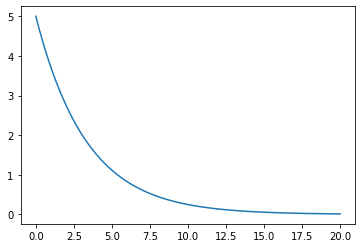

In [21]:
plt.plot(t,y_sol)

Lets visualize the solution to this differential equation using `matplotlib`. The command `plt.plot(t,y_sol)` will display a plot with $t$ on the horizontal axis and our predicted $y$ on the vertical axis.

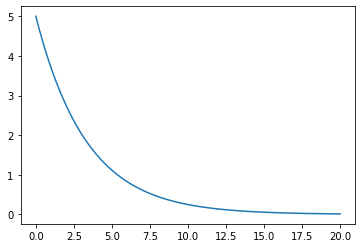

In [22]:
## Plotting the resulting solution

plt.plot(t,y_sol)

## Exploring the effect of parameters <a name="parameters"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Lets compare the solutions for $k = .3$, $k=.7$ and $k=1.1$. Numerically solving the decay equation for different $k$ values using `odeint` is as simple as rerunning the code we wrote above using different parameters but the same model.

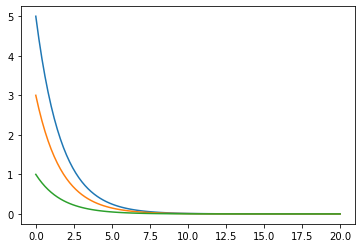

In [23]:
plt.plot(t, odeint(model,5,t,(0.6,)))
plt.plot(t, odeint(model,3,t,(0.6,)))
plt.plot(t, odeint(model,1,t,(0.6,)))

In [24]:
k1 = .3
k2 = .7
k3 = 1.1

y1 = odeint(model,y0,t,args=(k1,))
y2 = odeint(model,y0,t,args=(k2,))
y3 = odeint(model,y0,t,args=(k3,))

To plot them all on the same axis just requires the execution of several plot commands in the same cell.

Text(0.5, 1.0, "Solution to P'=-kP")

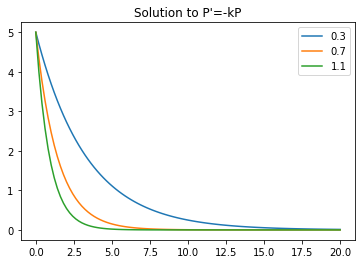

In [25]:
plt.plot(t,y1, label="0.3")
plt.plot(t,y2, label="0.7")
plt.plot(t,y3, label="1.1")

plt.legend()
plt.title("Solution to P'=-kP")

The `plt.plot` function has a lot of options. For example, for each line we can specify the axis labels, the line width, style and color, and the inclusion of a legend. 

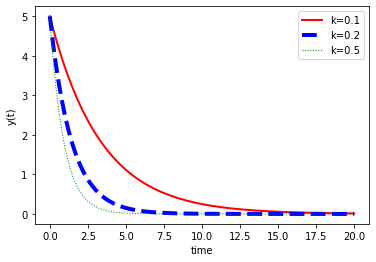

In [27]:
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=4,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=1,label='k=0.5')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Applications: <a name="applciations1"></a>

### 1.1 First Order Linear ODEs <a name="FOLODE"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Use `odeint` to solve

$$
\frac{dy}{dt} = -jy(t) + k\,,\hspace{5em} y(0) = 0\,,
$$

for $t\in [0,5]$. Plot the results for $k = 1,2,3$. You will need to define a new model function `dydt = model2(y,t,k)`, and specify the domain of `t`. It is worth giving the new model function a name like `model2` to make it distinct from the exponential decay model. 

In [28]:
def model2(y,t,j,k):
    dydt = -j*y + k
    return dydt

model2(1,2,3,4)

1

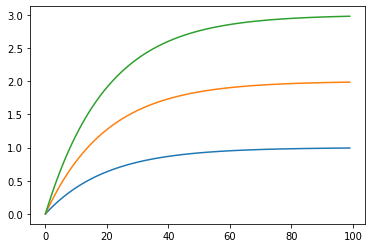

In [30]:
j = 1.0
k = 1
t = np.linspace(0, 5, 100)
y0 = 0

y_sol = odeint(model2, y0, t, args=(j, 1))
plt.plot(y_sol)

y_sol = odeint(model2, y0, t, args=(j, 2))
plt.plot(y_sol)

y_sol = odeint(model2, y0, t, args=(j, 3))
plt.plot(y_sol)

There's an easier way to run code over and over with slight changes, and that involves using a `for` loop:

<div class="alert alert-block alert-success">
<b>Hint:</b> A for loop does an action for each element of a set. For example, 
<br><br>

```
for i = [i1,i2,i3,..] :
    DO_SOMETHING_WITH i
    THEN_DO_SOMETHING_ELSE
    ...
```

<br><br>
In this case, `[i1,i2,i3,...]` is any list of values (or list off anything actually). For example, if we want to loop over the integers from 1 to 100, we `range(1,100)`.
</div>

For example, we can produce the three plot lines above with the following code:

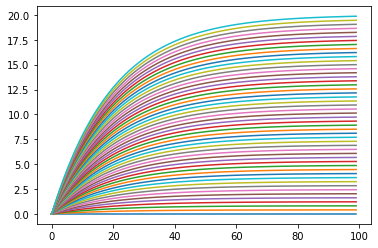

In [33]:
for k in np.linspace(0,20,50):
    y_sol = odeint(model2, y0, t, args=(j, k))
    plt.plot(y_sol)

In [ ]:
def model2(y,t,k):
    dydt = -y + k
    return dydt

y0 = 0
t = np.linspace(0,5,50)

plt.plot(t,odeint(model2,y0,t,(1,)))
plt.plot(t,odeint(model2,y0,t,(2,)))
plt.plot(t,odeint(model2,y0,t,(3,)))

Try it with $y_0$. Produce 10 plot lines that graph $y_0 = 0,1,2,\ldots, 10$. Remember that you can use `range(0,10)` to produce the list of integers.

We can also numerically solve more complicated equation. Use `odeint` to solve

$$
\frac{dy}{dt} = -y(t) + k\sin(t)\,,\hspace{5em} y(0) = 0\,,
$$

for $t\in [0,20]$. Plot the results for $k=1$ and $y_0 = -5,-4,\ldots, 5$. You will need to define a new model function `dydt = model3(y,t,k)`, and specify the domain of `t`. How do these solutions change as we change $k$?

In [34]:
def model3(y, t, k):
    dydt = -y + k * np.sin(t)
    return dydt

model3(1, 2, 4)

2.637189707302727

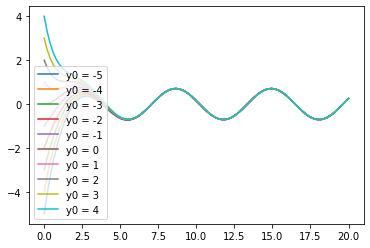

In [39]:
k = 1
t = np.linspace(0, 20, 100)

for y0 in range(-5, 5):
    y_sol = odeint(model3, y0, t, args=(k,))
    plt.plot(t, y_sol, label="y0 = " + str(y0))

plt.legend()

### 1.2 Beyond Smooth Equations <a name="Nonsmooth"></a><span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Many interesting physical systems *do not* smoothly relate their values with their derivatives. While this may be is difficult to deal with analytically, it is much easier numerically. Let $u(t)$ be the step function

$$
u(t) = \begin{cases}
0& \text{for }t<10
\\
2& \text{for }t\geq 10
\end{cases}\,.
$$

Solve the differential equation 

$$
5\frac{dy}{dt} = -y(t) + u(t)\,,\hspace{5em} y(0) = 1\,,
$$

for $t\in [0,20]$ and plot the result. What happens when you change the coefficient of $\frac{dy}{dt}$?

<div class="alert alert-block alert-success">
<b>Hint:</b> You will need to use an if/else statement in your definition of the function. The syntax is
<br><br>

```
if SOME_TEST :
    DO_THIS
    THEN_THIS
    ...
else:
    DO_THIS_OTHER_THING
    AND_THIS
    ...
```

<br><br>
In this case, `SOME_TEST` is any logical statement that can evaluate to true or false, like `t == 4`, `y>7` or `y<t`.
</div>



### 1.3 Exploring First Order Quadratic Equations <a name="FOQODE"></a> <span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Consider the family of differential equations given by 

$$
\frac{dy}{dt} = at^3 - byt\,,
$$

for constants $a$ and $b$. Solve this equation numerically for $y(0) = 1$ and $a = b$ and $y_0 \in \{-10,\ldots,10\}$. How do these solutions change as we change $a$, $b$?

/home/saint1729/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/home/saint1729/.local/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


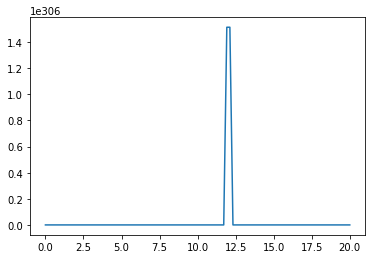

In [43]:
def model4(y, t, a, b):
    dydt = a*(t**3) - b*y*t
    return dydt

t = np.linspace(0, 20, 100)

b = -10
a = b

plt.plot(t, odeint(model4, 1, t, args=(a, b)))



## Case Study: Lake Burley Griffin<a name="CASE1"></a> <span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

*Lake Burley Griffin in Canberra, the capitol city of Australia, was created artificially in 1962 for both recreational and aesthetic purposes. In 1974 the public health authorities indicated that the pollution standards set down for safe use were being violated, and that this was attributed to the sewage works in Queanbeyan upstream.*

*After extensive measurements of pollution levels taken in the 1970s it was established that, while sewage plants (of which there are three above the lake) certainly exacerbated the problem, there was significant contributions from rural and urban runoff as well, particularly during summer rainstorms. These contribute to dramatic increases in pollution levels and at times were totally responsible for lifting the pollution levels above the safety limits.*

*In 1974 the mean concentration of the bacteria fecal coliform count was approximately $10^7 \,\text{bac }/m^{3}$ at the point where the river feeds the lake. The safety threshold for the fecal coliform count in the water is such that for contact recreational sports no more than 10% of the total samples over a 30 day period should exceed $4\times 10^6 \,\text{bac }/m^{3}$.*

The system can be modeled very simply with a few assumptions: Flow $F$ into the lake is assume to equal flow out of the lake, and the volume $V$ of the lake is considered to be constant and approximately $28\times 10^6 \, m^{3}$. Furthermore, the lake is assumed to be well mixed. Under these assumptions, a suitable differential equation model for the pollutant concentration is 

$$
\frac{dC}{dt} = \frac{F}{V}c_{in} - \frac{F}{V}C
$$

where $c_{in}$ is the concentration of the pollutant entering the lake. 

### Exercise:

If the fecal concentration entering the lake is $c_{in}=3\times 10^6 \, \text{bac }/m^3$, solve the flow equation for sevral different intial considerations: A clean lake, a lake with and initial concentration of $3\times 10^6 \, \text{bac }/m^3$, and a lake with $5\times 10^6 \,\text{bac }/m^3$.

<div class="alert alert-block alert-success">
<b>Hint:</b> Natively, Python doesn't have either a $\sin()$ function or $\pi$, but numpy does. Use `np.sin(t)` for $\sin(t)$ and `np.pi` for $\pi$.
</div>

<div class="alert alert-block alert-success">
<b>Hint:</b> Python also does exponents in a nonstandard way: instead of useing `10^6`, Python uses `10**6` for exponentiation.
</div>

### Exercise:

However, this model is still simplistic. Flow rates change over the year with on average seasonal patterns, while the amount of pollutant reaching the lake is also seasonal. Assuming a sinusoidal pattern over the year, a rouge estimate of the concentration from the data available in the 1970’s is taken as

$$
c_{in}(t) = 10^6(10+10\cos(2\pi t))\,,\hspace{5em} F(t) = 10^6(6+6\sin(2\pi t))\,.
$$

Resolve the equations above with $F$ no longer constant. 

## Case Study: Its a dogs life - the control of stray dogs<a name="CASE2"></a> <span class = "ToTOC"><a href="#TableOfContents" style="text-decoration:none">&#x2BA5;</a></span>

Stray dogs are abandoned dogs and their offspring living in urban environments. In [Amuaku et al (2010)](https://www.tandfonline.com/doi/abs/10.1080/08898481003689452), the authors considered how the theory of a single population could contribute to the design of practical programs for the control of stray dogs.

Stray dogs can cause a number of problems and in many countries around the world have become a major public health hazard. Stray dogs typically group into packs and breed, with shelters being unable to cope with the numbers roaming the streets.

Typically, euthanasia is the preferred strategy targeted at strays and although it has an impact on growth rates total eradication is unlikely due to new animals entering the population through abandonment. Here, we will attempt to make a mathematical model to study the effectiveness of euthanasia as a control mechanism.

We start by making some general assumptions about a population of dogs. Let N(t) be the density of the population, that is the number of animals per $km^2$. We assume logistic growth, so 

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right)
$$

Where $N = N(t)$ is a function of time, $r$ is the intrinsic growth rate and $K$ is the carrying capacity.  The parameter $r$ can be expressed crudely as the difference between the birth rate $a$ and the death rate $b$, so $r = a-b$.

To incorporate euthanasia, we assume that in each time step a constant proportion $\epsilon$ of stray dogs is euthanized in each $km^2$, that is a rate of $\epsilon N(t)$ per $km^2$. The result is a differential equation 

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) - \epsilon N
$$

### Analytic Problem 1: (1 Point)
Solve the differential equation above subject to the initial condition that $N(0) = N_0$. You must show your work. 

_Double click here to enter equation_

***

### Problem 2: (2 Point)
To generate results we require parameter estimates for the literature that are relevant to stray dogs. The carrying capacity was taken to be $250$, close to the average estimate taken in Baltimore in 1970-1971 (Beck, 2002). Further, according to Amaku et al appropriate birth and death rates are $a=0.34$ and $b=0.12$.

Solve the logistic equation with the parameters given for a **reasonable** initial populations $N(0)=N_0$ and $\epsilon$ in three ranges: $\epsilon > a$, $r <\epsilon <a$ and $\epsilon < r$. You may organize this information in any way you want, but be sure it is clearly labeled. 

2.a) What is a reasonable estimate for $N(0)$ given the information in the case study? What does it mean for $\epsilon >a$, $r<\epsilon<a$ and $\epsilon<r$?

2.b) Numerially solve for the solution to the logistic equation for three values of epsilon: one for $1>\epsilon >a$, $r<\epsilon<a$ and $0<\epsilon<r$. Use a reasonable value for $N_0$ in line with part a.

***

### Analytic Problem 3: (2 Point)

Fine the equilibrium solutions for our model and determine their stability in terms of the parameters $a$, $b$, $K$ and $\epsilon$. What must the value of $\epsilon$ be (in terms of $a$, $b$ and $K$) for the stray population to eventually go to 0?

_Double click here to enter equation_

***

### Problem 4: (1 Point)

Rehousing is not always an option, but in some cases shelters exist which can help mitigate the stray dog population. If the shelter system can rehouse $h$ dogs per year, the model becomes

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) - h
$$

Assume that $a$ and $b$ and $K$ are as above and $h=10$. Solve the equation numerically for $N_0 = 10$ and $N_0 = 100$ and plot the result.

---

### Analytic Problem 5: (1 Point)

For $a$, $b$, $K$ and $h$ as in Problem 4, for which initial populations $N_0$ does the number of stray dogs remain stable? For which $N_0$ does the population eventually go to 0? Provide an interval for each case.

_Double click here to enter equation_

---

### Analytic Problem 6: (1 Point)

Assume that $N_0$ = 30. What is the minimum value of $h$ in the re-homing model such that the population eventually falls to 0?

_Double click here to enter equation_

---

### Analytic Problem 7: (1 Point)

Consider the re-homing model and the euthanasia model. Fix $a$, $b$ and $K$ as above. 

7.a) Does $N_0$, the initial population, effect the long term behavior of either model? Justify your answer.

7.b) In the euthanasia model, is there a value of $\epsilon$ that guarantees the population will eventually fall to 0 regardless of $N_0$? If not, why not, and if so what is the value?

7.c) In the re-homing model, is there a value of $h$ that guarantees the population will eventually fall to 0 regardless of $N_0$? If not, why not, and if so what is the value?

_Double click here to enter equation_

***

## Bonus:

Consider the combined model

$$
\frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) - h - \epsilon N
$$

With $a$, $b$ and $K$ as above. Assume it is found that there are $N_0 = 30$ strays per $km^2$. 

Assume that the total cost of the combined solution is $C(\epsilon, h) = \alpha(\epsilon^2 + h)$. What is the most cost effective combination of euthanaisa and rehoming that eventaully diminishes the population to 0?

# Homework Submission Instructions:

Please complete all questions above. You may submit your homework in two ways:

* A Jupyter notebook containing the solutions to the analytic questions as well as the answers to the computational questions with the code. Jupyter support latex, so computations can be written out here. 

* A Jupyter notebook containing the answers to the computational questions, and an accompanying document answering the analytic questions to be turn in in class. 

#### Grading:

Homework is 10 Points, 1 points for readability and presentation. In addition, there are 5 points of automatic extra credit for using Latex/Jupyter PDF to answer the analytic questions. 